# CapsNets on Fashion Cifar-10 dataset

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__
%matplotlib inline

## Loading dataset and normalising

In [6]:
(X_train, y_train), (X_test , y_test) = tf.keras.datasets.cifar10.load_data()
X_train = X_train / 255.0
X_train = tf.cast(X_train, dtype=tf.float32)

X_test = X_test / 255.0
X_test = tf.cast(X_test, dtype=tf.float32)

y_train = y_train.reshape((len(y_train),))
y_test = y_test.reshape((len(y_test),))

# Reducing the size of the samples for faster training
X_train = X_train[:1024]
y_train = y_train[:1024]

X_test = X_test[:512]
y_test = y_test[:512]

X_train.shape, y_train.shape

(TensorShape([1024, 32, 32, 3]), (1024,))

1024 images of size 32x32 over three channel

## Sample visualisation

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

NameError: name 'classe_names' is not defined

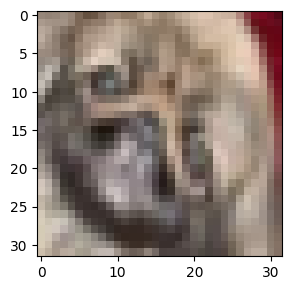

In [8]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

## Build CapsNet model

In [9]:
# Setting PATH to import CapsNet class from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from CapsNet import CapsNet

In [10]:
params = {
    "dataset": "CIFAR-10",
    "input_shape": (32, 32, 3),
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 256,
    "no_of_primary_capsules": 18,
    "primary_capsule_vector": 8,
    "no_of_secondary_capsules": 10,
    "secondary_capsule_vector": 16,
    "r":3,
    "train_metrics": ['accuracy', 'precision', 'recall', 'f1']
}

model = CapsNet(**params)
model.compile()
model.summary()

Model: "caps_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense (Dense)               multiple                  0 (unused)
                                                                 
 dense_1 (Dense)             multiple                  0 (unused)
                                                                 
 dense_2 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X_train, y_train, tf.keras.optimizers.Adam())

Epoch 1/10: 100%|██████████| 16/16 [00:12<00:00,  2.24it/s, Evaluating]/Users/mat/anaconda3/envs/capsnet/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch 2/10: 100%|██████████| 16/16 [00:06<00:00,  2.33it/s, Evaluating]/Users/mat/anaconda3/envs/capsnet/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch 3/10: 100%|██████████| 16/16 [00:06<00:00,  2.32it/s, Evaluating]/Users/mat/anaconda3/envs/capsnet/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is il

{'accuracy': ListWrapper([0.1103515625, 0.1533203125, 0.166015625, 0.20703125, 0.18359375, 0.2392578125, 0.2802734375, 0.287109375, 0.3291015625, 0.388671875]),
 'precision': ListWrapper([0.0268471848190187, 0.03353568629111493, 0.22927172480332905, 0.2077043869450523, 0.24156346282196425, 0.15008965198414642, 0.32443861512529365, 0.29345818564602505, 0.40310143763825346, 0.39255814623242447]),
 'recall': ListWrapper([0.1103515625, 0.1533203125, 0.166015625, 0.20703125, 0.18359375, 0.2392578125, 0.2802734375, 0.287109375, 0.3291015625, 0.388671875]),
 'f1': ListWrapper([0.036796594006406655, 0.05412176183569001, 0.07665044691760174, 0.10960690506652856, 0.08865682677748271, 0.15982564267427996, 0.24960858476772743, 0.24403685929799226, 0.284224282568431, 0.36824938082588005]),
 'loss': ListWrapper([0.019452296, 0.009103342, 0.00864816, 0.008449252, 0.008153177, 0.0077902963, 0.007590149, 0.007305356, 0.0071744923, 0.006810316])}

In [12]:
preds = model.predict(X_test)

## Loading and saving

INFO:tensorflow:Assets written to: ../saved_models/caps_net-CIFAR-10/assets


INFO:tensorflow:Assets written to: ../saved_models/caps_net-CIFAR-10/assets


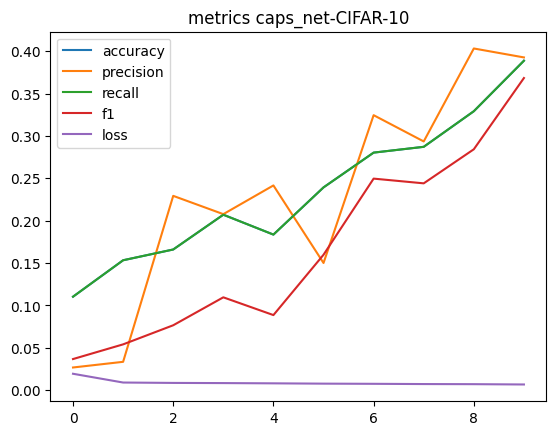

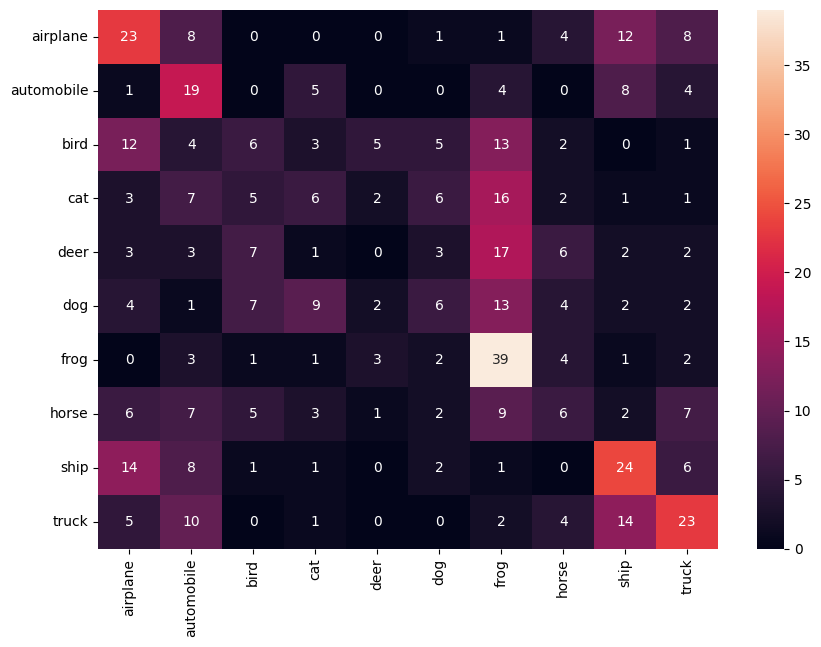

In [13]:
model.save(evaluate=(X_test, y_test), classes=class_names)

In [14]:
loaded_model = tf.keras.models.load_model('../saved_models/caps_net-CIFAR-10', custom_objects={'CapsNet': CapsNet})
loaded_model.compile()
loaded_model.summary()

Model: "caps_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  62464     
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  2986128   
                                                                 
 dense (Dense)               multiple                  82432     
                                                                 
 dense_1 (Dense)             multiple                  525312    
                                                                 
 dense_2 (Dense)             multiple                  1049600   
                                                                 
Total params: 6,180,496
Trainable params: 6,180,496
Non-trainable params: 0
_________________________________________________________________
